In [1]:
import equilibrator_api
from equilibrator_api import ComponentContribution, Q_, ureg
import equilibrator_pathway
from equilibrator_pathway import ThermodynamicModel
import matplotlib.pyplot as plt

print('equlibrator_api version:', equilibrator_api.__version__)
print('equlibrator_pathway version:', equilibrator_pathway.__version__)

ureg.default_format = ".2f~P"
plt.rc('axes', axisbelow=True)
ureg.setup_matplotlib(True)

comp_contrib = ComponentContribution()


equlibrator_api version: 0.4.7
equlibrator_pathway version: 0.4.7


 ## Conditions
 pH 7.5, ionic strength 0.25 M, pMg 3.

 Upper bound for FA is set to 0.5mM.

In [2]:
EuMP = ThermodynamicModel.from_sbtab('EuMP.tsv', comp_contrib=comp_contrib)

EuMP.update_standard_dgs()
EuMP_mdf = EuMP.mdf_analysis()

EuMP_mdf.reaction_df


,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,EPS,dhap + fald = lEu1P,3.00 mM/s,-29.07 kJ/mol,-31.48 kJ/mol,-14.37 kJ/mol,-3.69 kJ/mol,0.10421
1,LerI,lEu1P = dEu4P,3.00 mM/s,-0.01 kJ/mol,-0.01 kJ/mol,-0.01 kJ/mol,-3.69 kJ/mol,0.19023
2,DerI,dEu4P = e4p,3.00 mM/s,6.76 kJ/mol,4.12 kJ/mol,4.12 kJ/mol,-3.69 kJ/mol,0.19023
3,TKT1,e4p + xu5p = f6p + gap,2.00 mM/s,-10.30 kJ/mol,-8.34 kJ/mol,-8.34 kJ/mol,-3.69 kJ/mol,0.09511
4,PFK,atp + f6p = adp + fbp,1.00 mM/s,-17.81 kJ/mol,-17.68 kJ/mol,-17.68 kJ/mol,-7.63 kJ/mol,0.00000
5,FBA,fbp = dhap + gap,1.00 mM/s,23.16 kJ/mol,23.28 kJ/mol,6.17 kJ/mol,-5.17 kJ/mol,0.00000
6,TAL,e4p + f6p = gap + s7p,1.00 mM/s,0.94 kJ/mol,-0.04 kJ/mol,-0.04 kJ/mol,-3.69 kJ/mol,0.09511
7,TKT2,gap + s7p = r5p + xu5p,1.00 mM/s,3.83 kJ/mol,2.74 kJ/mol,2.74 kJ/mol,-3.69 kJ/mol,0.08602
8,RPI,r5p = ru5p,1.00 mM/s,2.14 kJ/mol,1.69 kJ/mol,1.69 kJ/mol,-3.69 kJ/mol,0.08602
9,RPE,ru5p = xu5p,1.00 mM/s,-3.39 kJ/mol,-3.69 kJ/mol,-3.69 kJ/mol,-3.69 kJ/mol,0.04887


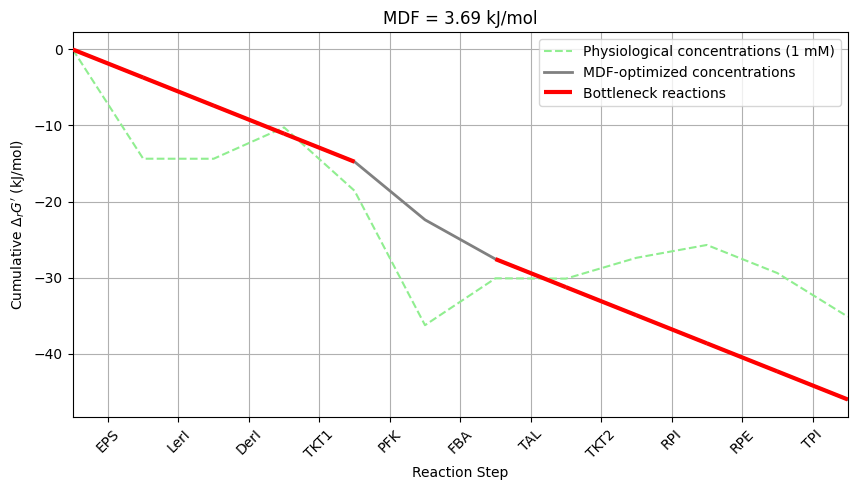

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
EuMP_mdf.plot_driving_forces(ax)
ax.grid('on')
fig.savefig('mdf_result_EuMP.eps')


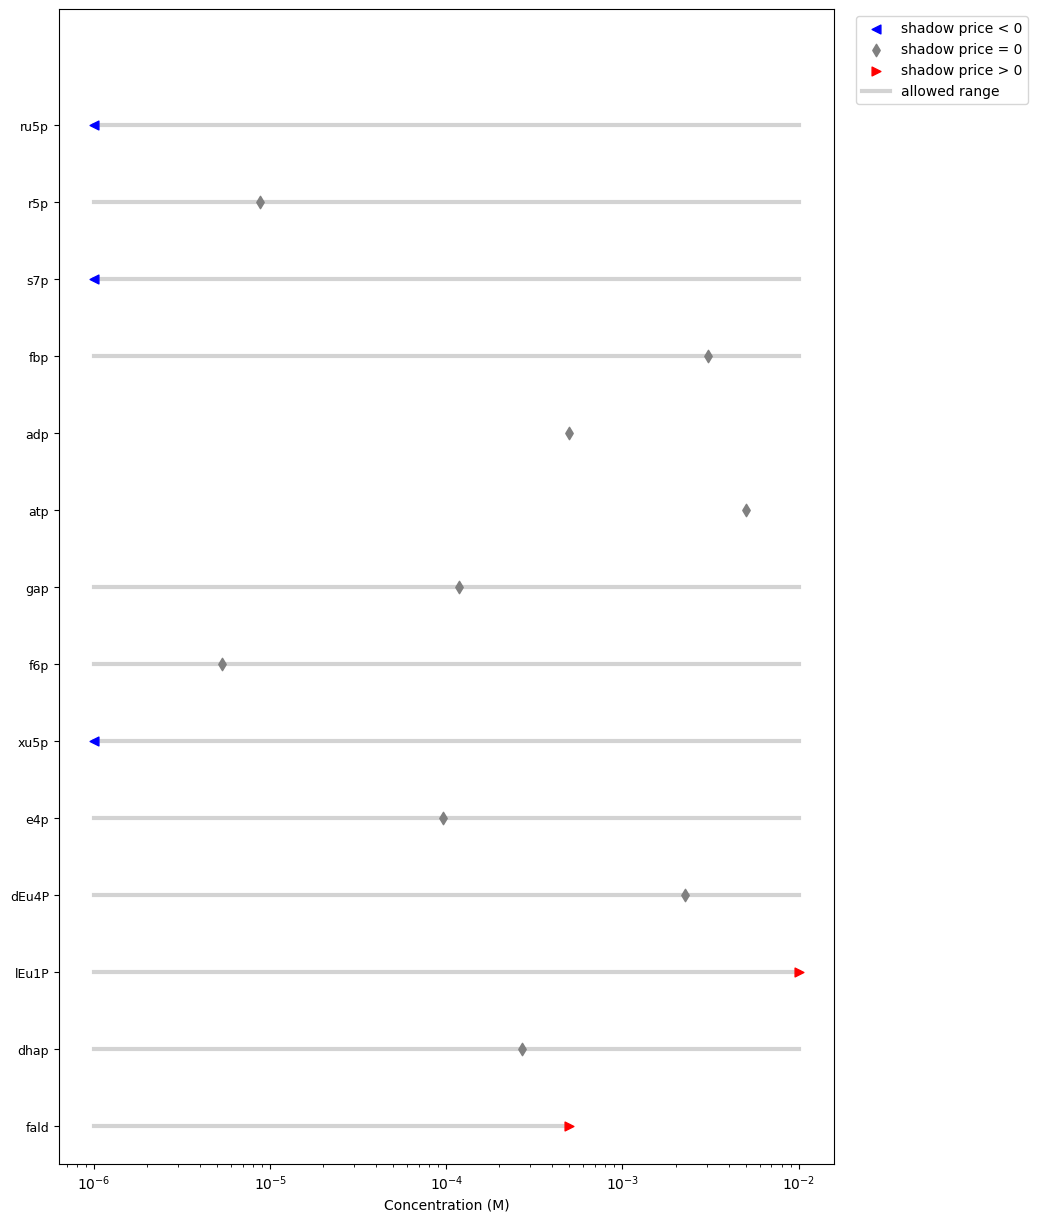

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
EuMP_mdf.plot_concentrations(ax)
